In [287]:
import pandas as pd
import sqlite3 as sql
import matplotlib.pyplot as plt
import numpy as np
import jdcal as jd

# Visualize the frequency and volume of writing

## Access the database and prepare the data

In [235]:
### Get the data from the 'text' table
#
conn = sql.connect('exported_data_analysis/ampi.sqlite')
q1 = """SELECT * FROM texts ORDER BY date_day"""
pd_texts = pd.read_sql_query(q1, conn, index_col='index')
conn.close()

In [236]:
pd_texts[:3] #[15:30]

,pk_text,length,year_month,date_day,julian_date,text
index,,,,,,
195,23400736.0,954,,,2385056,[Beilage 2 Heft 14]\n \n \n1816 12 31\nDank Va...
201,23400737.0,3277,,,2385088,[Beilage 3 Heft 14]\n \n[Unles.] um daselbst e...
207,23400735.0,316,,,2385098,[Beilage 1 Heft 14]\n \n \nFreudigkeit u frohe...


In [ ]:
print(len(pd_texts))
pd_texts.sort_values(by=['date_day'])[15:18]

In [237]:
## new dataframe without outlier and not dated texts
npd_texts = pd_texts.loc[(pd_texts.year_month > '1794') & (not pd_texts.text.empty)].sort_values(by=['date_day'])
length = len(npd_texts)
print(length)
npd_texts.head()

770


,pk_text,length,year_month,date_day,julian_date,text
index,,,,,,
1,23381914.0,1595,1795-11,1795-11-23,2376997,[23. November 1795]\n\n[3]\n\n95 11 23\nWer mi...
2,23381935.0,1291,1795-11,1795-11-27,2377001,[27. November 1795 (abends)]\n\nAbend d 27\nIs...
3,23381937.0,2230,1795-11,1795-11-28,2377002,[28. November 1795]\n\n28 Nov\nDer Egoismus im...
4,23381939.0,2355,1795-12,1795-12-10,2377014,[10. Dezember 1795]\n\n95 12 10\nGewiß eine dr...
5,23381941.0,1961,1796-01,1796-01-01,2377036,"[XX.XX.XX]\n\n[xxx]\n\n[19]\n\nlau zum Guten, ..."


In [238]:
print('Min: ' + min(npd_texts['date_day']) + ' [julian: ' + str(min(npd_texts['julian_date'])) +' ] ')
print('Max: ' +  max(npd_texts['date_day']) + ' [julian: ' + str(max(npd_texts['julian_date'])) +' ] ')
print('Median Date: ' + npd_texts['date_day'][length//2])

#print(pd_dsl_texts.head())
print(npd_texts[['date_day', 'length', 'text']][:2])
print(npd_texts[['date_day', 'length', 'text']][-2:])


Min: 1795-11-23 [julian: 2376997 ] 
Max: 1839-01-01 [julian: 2392741 ] 
Median Date: 1826-04-26
         date_day  length                                               text
index                                                                       
1      1795-11-23    1595  [23. November 1795]\n\n[3]\n\n95 11 23\nWer mi...
2      1795-11-27    1291  [27. November 1795 (abends)]\n\nAbend d 27\nIs...
         date_day  length                                               text
index                                                                       
602    1838-01-01     242  [XX.XX.1838]\n\n[23]\n\nden 4. [?] Nov. kam me...
603    1839-01-01     237  [XX.XX.1839]\n\n[25]\n\n1839\nMarz den 7 Am En...


In [239]:
### Create a list of all days between 1795-11-13 and 1839-01-10'
period = 1
d_start = 2376997 - 10
d_end = 2392741 + 10

date = d_start
day_list = []
while date < d_end: #d_end:
    date_value = jd.jd2gcal(date, 0)[:3]
    j_day = (date_value[0],date_value[1],date_value[2])
    iso_j_day = pd.datetime(year = j_day[0],  month = j_day[1], day = j_day[2]).isoformat()[:10]
    day_list.append(iso_j_day)
    date = date + period

In [240]:
print(len(day_list))
day_list[:3]

15764


['1795-11-13', '1795-11-14', '1795-11-15']

In [241]:
###
daily_list = []

for d in day_list:
    count_t = 0
    sum_len_t = 0
    d_series = npd_texts.loc[npd_texts['date_day']== d, 'length']
    for length in d_series:
        count_t += 1
        sum_len_t = sum_len_t + length
    daily_list.append([d, count_t, sum_len_t]) 
print(daily_list[:20])

[['1795-11-13', 0, 0], ['1795-11-14', 0, 0], ['1795-11-15', 0, 0], ['1795-11-16', 0, 0], ['1795-11-17', 0, 0], ['1795-11-18', 0, 0], ['1795-11-19', 0, 0], ['1795-11-20', 0, 0], ['1795-11-21', 0, 0], ['1795-11-22', 0, 0], ['1795-11-23', 1, 1595], ['1795-11-24', 0, 0], ['1795-11-25', 0, 0], ['1795-11-26', 0, 0], ['1795-11-27', 1, 1291], ['1795-11-28', 1, 2230], ['1795-11-29', 0, 0], ['1795-11-30', 0, 0], ['1795-12-01', 0, 0], ['1795-12-02', 0, 0]]


In [242]:
df_daily_list = pd.DataFrame(daily_list)
df_daily_list.columns = ['date_day', 'freq', 'length']
df_daily_list.head()

,date_day,freq,length
0,1795-11-13,0,0
1,1795-11-14,0,0
2,1795-11-15,0,0
3,1795-11-16,0,0
4,1795-11-17,0,0


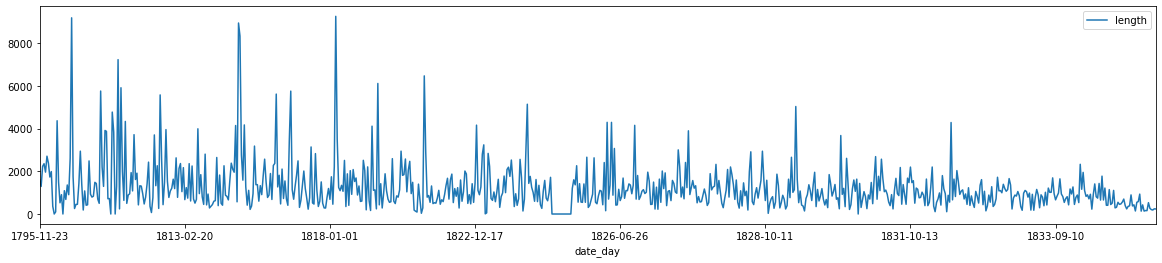

In [243]:
### just the data, missing dates, not the whole temporal extension
npd_texts.plot( 'date_day' , 'length' , figsize=(20,4)) 

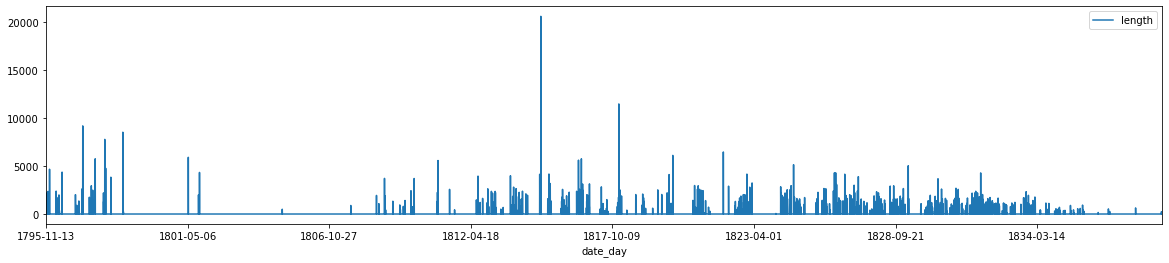

In [252]:
### the whole temporal extension and the data
# Note: indexing the dataframe with 'date_day' does not change the plot

df_daily_list.plot( 'date_day' , 'length' , figsize=(20,4)) 

In [253]:
### Create a list of all months between 1795 and 1840
m_list = ['01','02','03','04','05','06','07','08','09','10','11','12']
period = 1
d_start = 1795
d_end = 1840

date = d_start
date_list = []
while date < d_end:
    for m in m_list:
        date_list.append(str(date) + '-' + m)
    date = date + period



In [254]:
print(len(date_list))
print(date_list[:5])
print(date_list[-5:])

540
['1795-01', '1795-02', '1795-03', '1795-04', '1795-05']
['1839-08', '1839-09', '1839-10', '1839-11', '1839-12']


In [257]:
### Count number of signs per month
monthly_list = []

for d in date_list:
    count_t = 0
    sum_len_t = 0
    d_series = npd_texts.loc[npd_texts['year_month']== d, 'length']
    for length in d_series:
        count_t += 1
        sum_len_t = sum_len_t + length
    monthly_list.append([d, count_t, sum_len_t]) 
print(monthly_list[:20])

[['1795-01', 0, 0], ['1795-02', 0, 0], ['1795-03', 0, 0], ['1795-04', 0, 0], ['1795-05', 0, 0], ['1795-06', 0, 0], ['1795-07', 0, 0], ['1795-08', 0, 0], ['1795-09', 0, 0], ['1795-10', 0, 0], ['1795-11', 3, 5116], ['1795-12', 1, 2355], ['1796-01', 2, 4668], ['1796-02', 0, 0], ['1796-03', 0, 0], ['1796-04', 2, 4116], ['1796-05', 4, 2449], ['1796-06', 1, 4366], ['1796-07', 0, 0], ['1796-08', 0, 0]]


In [261]:
df_monthly_list = pd.DataFrame(monthly_list)
df_monthly_list.columns = ['date', 'freq', 'length']
print(df_monthly_list[10:15], df_monthly_list[-50:-45])

       date  freq  length
10  1795-11     3    5116
11  1795-12     1    2355
12  1796-01     2    4668
13  1796-02     0       0
14  1796-03     0       0         date  freq  length
490  1835-11     1     581
491  1835-12     3    1493
492  1836-01     2     299
493  1836-02     0       0
494  1836-03     0       0


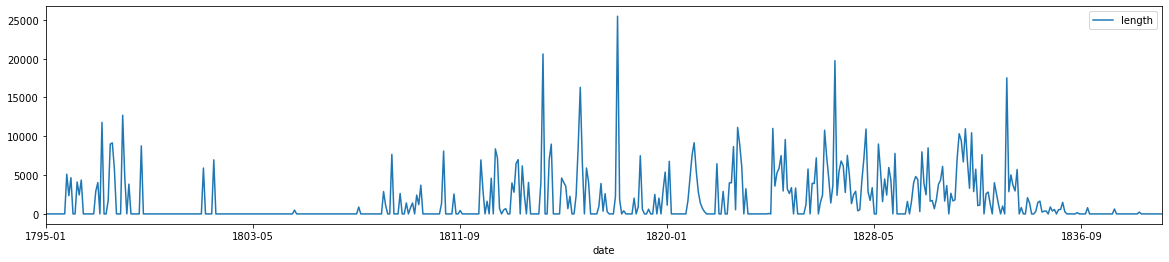

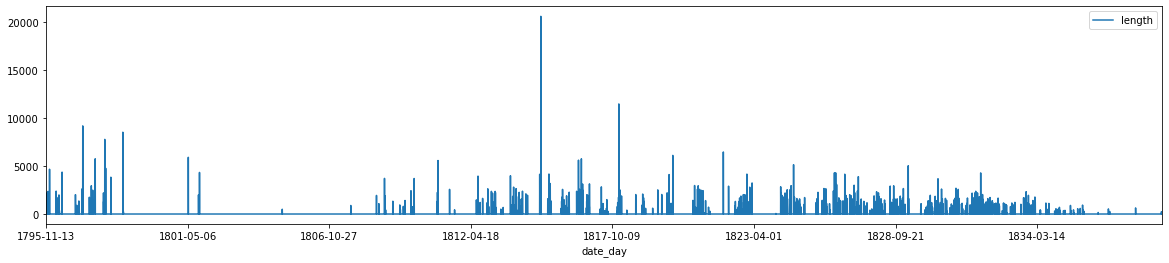

In [264]:
### Compare monthly and daily plot 
df_monthly_list.plot( 'date' , 'length' , figsize=(20,4)) 
df_daily_list.plot( 'date_day' , 'length' , figsize=(20,4)) 

In [341]:
### Calculate and add monthly mean text length 
meanText = df_monthly_list['length']/df_monthly_list['freq']
df_monthly_list['meanText'] = meanText.fillna(0).astype(int)
df_monthly_list[10:14]

,date,freq,length,meanText
date,,,,
1795-11,1795-11,3,5116,1705
1795-12,1795-12,1,2355,2355
1796-01,1796-01,2,4668,2334
1796-02,1796-02,0,0,0


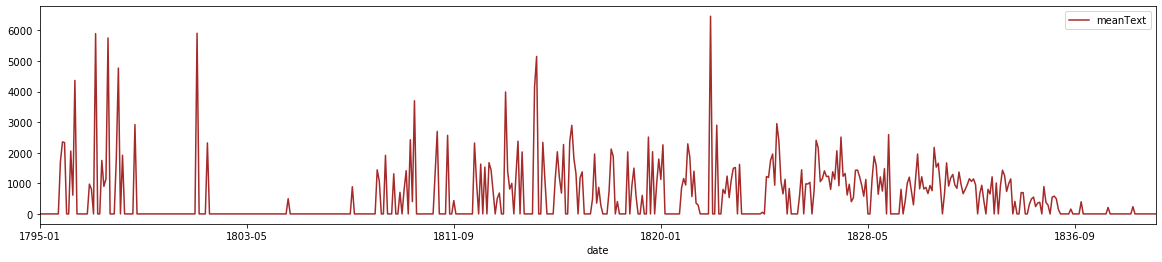

In [342]:
p = df_monthly_list.plot( 'date' , 'meanText' , figsize=(20,4), color='brown') 

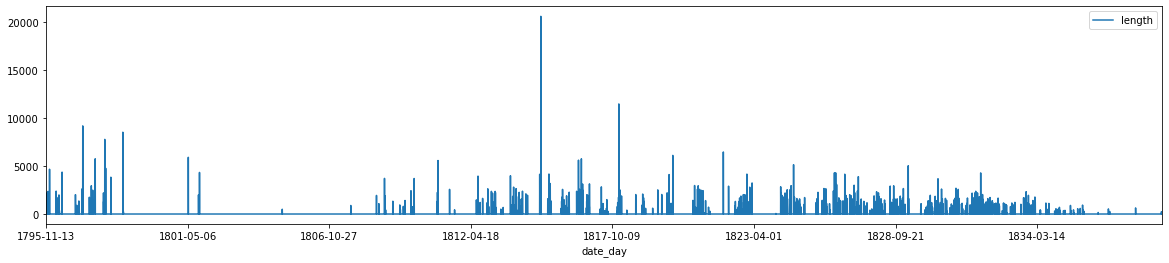

In [346]:
### just the data, missing dates, not the whole temporal extension
df_daily_list.plot( 'date_day' , 'length' , figsize=(20,4)) 

In [384]:
idx_df_monthly_list = df_monthly_list
idx_df_monthly_list.index = pd.to_datetime(idx_df_monthly_list.date + '-01')
# idx_df_monthly_list.head()

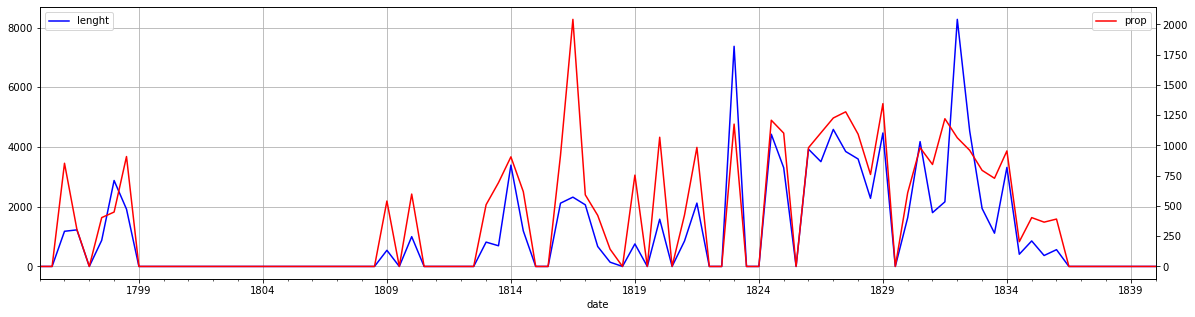

In [385]:
#### https://cmdlinetips.com/2019/10/how-to-make-a-plot-with-two-different-y-axis-in-python-with-matplotlib/

df = df_monthly_list

plt.figure(figsize=(20,5))
plt.xlabel('Legende')
# plt.xticks(rotation=45)

ax1 = df.length.resample("6m").median().plot(color='blue', grid=True, label='lenght')  # df.length.plot(color='blue', grid=True, label='length')
ax2 = df.meanText.resample("6m").median().plot(color='red', grid=True, secondary_y=True, label='prop')   # df.lengthProp.plot(color='red', grid=True, secondary_y=True, label='prop')

ax1.legend(loc=2)
ax2.legend(loc=1)


plt.show()

